# Data Preparation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/bookdealer_recommendations.csv')

In [3]:
df.head()

,title,price,author,publisher,isbn,category,translator,pages,date,series,recommendations,bookstores,synopsis
0,Cambiare l'acqua ai fiori,18,Perrin Valérie,E/O,9788833570990,Letterature straniere: testi,Bracci Testasecca A.,476,10/07/2019,Dal mondo,63.0,"81/libreria-tasso, 60/a-tutto-libro, 55/libris...",\nTab Article\nViolette Toussaint è guardiana ...
1,"Ragazza, donna, altro",20,Evaristo Bernardine,Sur,9788869982279,Letterature straniere: testi,Testa M.,520,11/11/2020,BigSur,61.0,39/la-confraternita-delluva-libreria-indipende...,\nTab Article\nÈ una grande serata per Amma: u...
2,L'Ickabog,19,Rowling J. K.,Salani,9788831006705,Letteratura per ragazzi,Daniele V.,320,10/11/2020,NaN,44.0,"168/magia-del-fumetto, 486/lotta-libreria, 306...",\nTab Article\nC'era una volta un regno chiama...
3,Borgo Sud,18,Di Pietrantonio Donatella,Einaudi,9788806244781,Letteratura italiana: testi,NaN,168,03/11/2020,Supercoralli,36.0,"285/libreria-fogola-pisa, 512/libreria-di-donn...",\nTab Article\nÈ il momento più buio della not...
4,Dante,20,Barbero Alessandro,Laterza,9788858141649,Letteratura italiana: critica,NaN,361,08/10/2020,I Robinson,36.0,"51/il-ponte-sulla-dora, 116/lettera22, 433/lib...","\nTab Article\nDante è l'uomo su cui, per la f..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21014 entries, 0 to 21013
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            21014 non-null  object 
 1   price            21014 non-null  int64  
 2   author           19732 non-null  object 
 3   publisher        21014 non-null  object 
 4   isbn             21014 non-null  int64  
 5   category         20995 non-null  object 
 6   translator       7648 non-null   object 
 7   pages            20021 non-null  object 
 8   date             21014 non-null  object 
 9   series           16087 non-null  object 
 10  recommendations  20905 non-null  float64
 11  bookstores       20905 non-null  object 
 12  synopsis         20061 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.1+ MB


## Missing Values

In [5]:
df.isna().sum()

title                  0
price                  0
author              1282
publisher              0
isbn                   0
category              19
translator         13366
pages                993
date                   0
series              4927
recommendations      109
bookstores           109
synopsis             953
dtype: int64

In [6]:
df.drop(columns=['author','title','translator','series'], inplace=True)

In [7]:
df.dropna(subset=['category', 'bookstores', 'recommendations', 'synopsis'], inplace=True)

In [8]:
df['pages'] = pd.to_numeric(df['pages'],errors='coerce')
df.fillna({'pages': df['pages'].median()}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 0 to 21013
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            19945 non-null  int64  
 1   publisher        19945 non-null  object 
 2   isbn             19945 non-null  int64  
 3   category         19945 non-null  object 
 4   pages            19945 non-null  float64
 5   date             19945 non-null  object 
 6   recommendations  19945 non-null  float64
 7   bookstores       19945 non-null  object 
 8   synopsis         19945 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['recommendations'] = df['recommendations'].astype(int)
df['pages'] = pd.to_numeric(df['pages'])

## Basic Statistics

In [11]:
df.describe()

,price,isbn,pages,recommendations
count,19945.000000,1.994500e+04,19945.000000,19945.000000
mean,16.414390,9.788878e+12,234.190925,1.579093
std,10.944404,5.584080e+08,234.481641,1.877590
min,0.000000,9.780715e+12,1.000000,1.000000
25%,12.000000,9.788830e+12,112.000000,1.000000
50%,15.000000,9.788857e+12,192.000000,1.000000
75%,18.000000,9.788879e+12,292.000000,1.000000
max,520.000000,9.798573e+12,7084.000000,63.000000


In [12]:
df.corr(numeric_only=True)

,price,isbn,pages,recommendations
price,1.000000,-0.018544,0.411775,0.007805
isbn,-0.018544,1.000000,-0.009521,0.021364
pages,0.411775,-0.009521,1.000000,0.015383
recommendations,0.007805,0.021364,0.015383,1.000000


## Recommendations and Bookstores 

These 2 variables are strictly related, since _bookstore_ column is the list of bookstores that recommends that particular book.

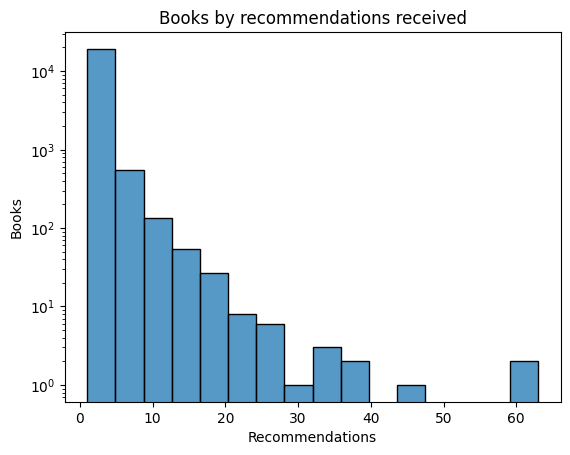

In [13]:
fig, ax = plt.subplots()
ax = sns.histplot(data=df, x='recommendations')
ax.set_xlabel('Recommendations')
ax.set_ylabel('Books')
ax.set_yscale('log')
ax.set_title('Books by recommendations received')
plt.show()

In [14]:
# Create nested list with bookstore list for every book
bookstores_by_book = [bookstores_in_book.split(', ') for bookstores_in_book in df['bookstores']]

In [15]:
# Get bookstore list
bookstores = list(set(bookstore for bookstores_in_book in bookstores_by_book 
    for bookstore in bookstores_in_book))

In [16]:
# Count recommendations done by bookstore
recommendations_by_bookstore = [sum(bookstores_in_book.count(bookstore)
    for bookstores_in_book in bookstores_by_book)
    for bookstore in bookstores]

Number of local bookstores: 527


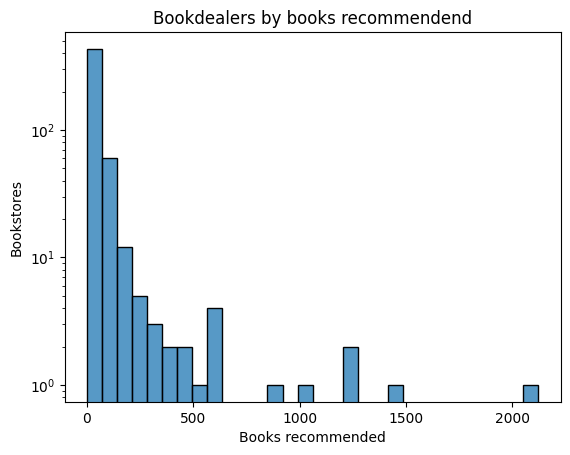

In [17]:
print(f'Number of local bookstores: {len(bookstores)}')

fig, ax = plt.subplots()
ax = sns.histplot(recommendations_by_bookstore, bins=30)
ax.set_xlabel('Books recommended')
ax.set_ylabel('Bookstores')
ax.set_yscale('log')
ax.set_title('Bookdealers by books recommendend')
plt.show()

As for recommendations and bookstores, we are dealing with power law distributions. The tails of the two distributions look anomalous, but outlier detection may not be strictly necessary for those columns. However, we should consider removing books that were recommended only once by booksellers who made only that recommendation:

In [18]:
# Get bookstores that recommended only 1 book
bookstores1 = [bookstore[0] for bookstore in list(zip(bookstores, recommendations_by_bookstore)) if bookstore[1] ==1]

In [19]:
rows2remove = df[df['bookstores'].isin(bookstores1) & df['recommendations'] ==1].index

df.drop(index=rows2remove, inplace=True)

For now, _bookstores_ variable is just the list of bookstores that recommends that particular book. We can get the most from this variable using one hot encoding. 

In [20]:
df_one_hot = df['bookstores'].str.get_dummies(sep=', ')

In [21]:
#df_one_hot.to_csv('../data/books-one-hot.csv', index=False)

## Category

This column is pretty messy. Infrequent books are non-fiction books. By performing clustering or topic modeling, we could merge them consistently and provide better categorization.

In [22]:
df['category'].value_counts()

Letteratura per ragazzi              6030
Letterature straniere: testi         3891
Letteratura italiana: testi          3157
Disegno, arti decorative e minori     821
Scienze sociali                       549
                                     ... 
Paleontologia. paleozoologia            1
Manifatture per specifici usi           1
Lingue germaniche. tedesco              1
Lingue romanze. francese                1
Chiesa locale e ordini religiosi        1
Name: category, Length: 88, dtype: int64

In [23]:
df['category'].value_counts()[:20]

Letteratura per ragazzi                6030
Letterature straniere: testi           3891
Letteratura italiana: testi            3157
Disegno, arti decorative e minori       821
Scienze sociali                         549
Geografia generale. viaggi              462
Arti ricreative. spettacolo. sport      418
Diritto                                 331
Problemi e servizi sociali              327
Scienza politica                        317
Psicologia                              307
Storia d'europa                         285
Economia domestica e vita familiare     253
Filosofia occidentale moderna           237
Musica                                  203
Educazione                              167
Fotografia                              152
Letteratura italiana: critica           115
Arti                                    102
Economia                                 97
Name: category, dtype: int64

In [24]:
df['category'].unique()

array(['Letterature straniere: testi', 'Letteratura per ragazzi',
       'Letteratura italiana: testi', 'Letteratura italiana: critica',
       'Disegno, arti decorative e minori', 'Fisica', 'Scienze sociali',
       'Problemi e servizi sociali', 'Scienza politica',
       'Economia domestica e vita familiare', 'Etica',
       'Scienze zoologiche', 'Storia del mondo antico. archeologia',
       'Scienze della terra', 'Scienze botaniche', 'Scienze della vita',
       'Geografia e storia', 'Letteratura greca e latina: critica',
       'Arti ricreative. spettacolo. sport', 'Fotografia',
       'Geografia generale. viaggi', 'Lingua italiana, lingue ladine',
       'Letteratura', 'Letterature straniere: critica',
       'Altre religioni. religione comparata', 'Psicologia', 'Musica',
       'Architettura', 'Pittura', "Storia d'europa",
       'Lingua inglese e anglosassone', 'Giornalismo, editoria, giornali',
       'Educazione', 'Arti', 'Agricoltura e tecnologie connesse',
       'Filosofia

In [25]:
fiction_labels = ['Letteratura per ragazzi', 'Letterature straniere: testi', 'Letteratura italiana: testi']

df['fiction'] = [1 if category in fiction_labels else 0 for category in df['category']]

In [26]:
df['fiction'].value_counts()

1    13078
0     6851
Name: fiction, dtype: int64

## Publisher

The distribution of publishers follows Zipf's law:

Number of publishers: 1177


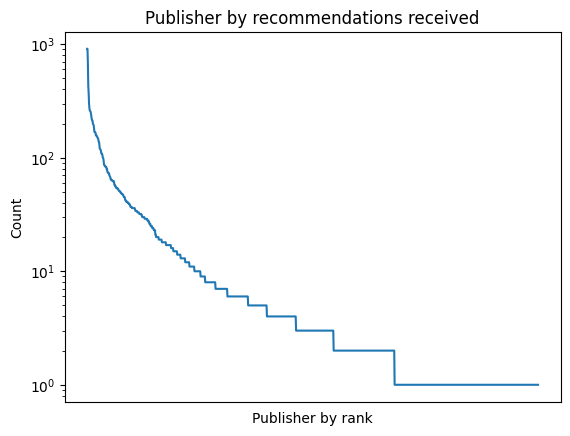

In [27]:
print(f'Number of publishers: {len(df["publisher"].unique())}')

publisher_counts = df['publisher'].value_counts()

fig, ax = plt.subplots()
ax = sns.lineplot(data=publisher_counts, x=publisher_counts.index, y=publisher_counts.values)
ax.set_xticks([])
ax.set_xlabel('Publisher by rank')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_title('Publisher by recommendations received')
plt.show()

In [28]:
df['publisher'].value_counts()[:20]

Einaudi                       912
Mondadori                     909
Feltrinelli                   677
Adelphi                       429
Rizzoli                       372
Piemme                        300
Salani                        273
Sassi                         260
Laterza                       258
Bompiani                      255
Newton Compton Editori        245
Babalibri                     231
Sellerio Editore Palermo      220
Il Castoro                    214
Giunti Editore                213
Terre di Mezzo                199
Gribaudo                      196
Edizioni Giuridiche Simone    194
Garzanti                      183
Il Saggiatore                 169
Name: publisher, dtype: int64

## Price and Pages

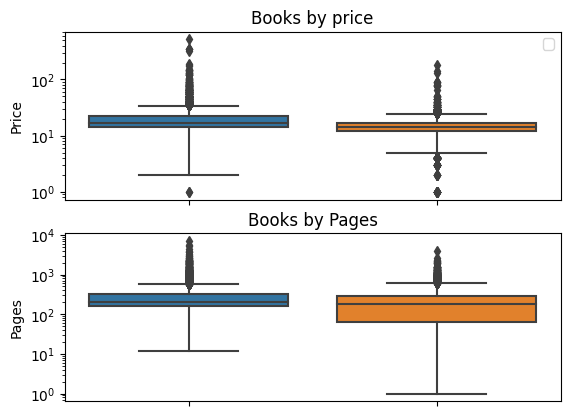

In [29]:
fig, (ax1, ax2) = plt.subplots(2)

sns.boxplot(data=df, y='price', x='fiction', ax=ax1)
ax1.set_ylabel('Price')
ax1.set_yscale('log')
ax1.set_title('Books by price')
ax1.set(xticklabels=[])
ax1.set(xlabel=None) 


handles, _ = ax.get_legend_handles_labels()          
ax1.legend(handles, ['Fiction', 'Non-Fiction'], loc="upper right")

sns.boxplot(data=df, y='pages', x='fiction', ax=ax2)
ax2.set_ylabel('Pages')
ax2.set_yscale('log')
ax2.set_title('Books by Pages')
ax2.set_xticklabels(['Fiction', 'Non-Fiction'])
ax2.set(xticklabels=[])
ax2.set(xlabel=None) 
plt.show()


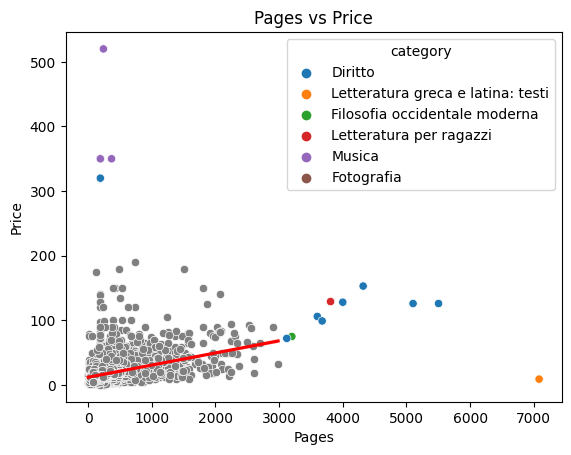

In [30]:
are_outliers = 'price > 300 or pages > 3000'
are_inliers = 'price < 300 and pages < 3000'

fig, ax = plt.subplots()
ax = sns.scatterplot(data=df.query(are_inliers), x='pages', y='price', color='gray')
ax = sns.regplot(df.query(are_inliers), x='pages', y='price', scatter=False, color='red')
ax = sns.scatterplot(data=df.query(are_outliers), x='pages', y='price', hue='category')
ax.set_xlabel('Pages')
ax.set_ylabel('Price')
ax.set_title('Pages vs Price')
plt.show()

In [31]:
pages_price_corr = df.query(are_inliers)['pages'].corr(df.query(are_inliers)['price'])

print(f'Correlation between pages and price {pages_price_corr}')

Correlation between pages and price 0.4565337655802477


The dataset is confirmed to be very heterogeneous. It isn't easy to detect outliers/anomalies properly because it depends on what factors we consider and the tasks we will do.

## Date

In [32]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [33]:
df.drop(columns=['date'])

,price,publisher,isbn,category,pages,recommendations,bookstores,synopsis,fiction,year
0,18,E/O,9788833570990,Letterature straniere: testi,476.0,63,"81/libreria-tasso, 60/a-tutto-libro, 55/libris...",\nTab Article\nViolette Toussaint è guardiana ...,1,2019
1,20,Sur,9788869982279,Letterature straniere: testi,520.0,61,39/la-confraternita-delluva-libreria-indipende...,\nTab Article\nÈ una grande serata per Amma: u...,1,2020
2,19,Salani,9788831006705,Letteratura per ragazzi,320.0,44,"168/magia-del-fumetto, 486/lotta-libreria, 306...",\nTab Article\nC'era una volta un regno chiama...,1,2020
3,18,Einaudi,9788806244781,Letteratura italiana: testi,168.0,36,"285/libreria-fogola-pisa, 512/libreria-di-donn...",\nTab Article\nÈ il momento più buio della not...,1,2020
4,20,Laterza,9788858141649,Letteratura italiana: critica,361.0,36,"51/il-ponte-sulla-dora, 116/lettera22, 433/lib...","\nTab Article\nDante è l'uomo su cui, per la f...",0,2020
...,...,...,...,...,...,...,...,...,...,...
21009,4,Tetra,9791280917003,Letteratura italiana: testi,84.0,1,41/libreria-zabarella,\nTab Article\nTrascinandosi tra abusi e osses...,1,2022
21010,4,Tetra,9791280917010,Letteratura italiana: testi,92.0,1,41/libreria-zabarella,"\nTab Article\nA Mario, ex enfant prodige dell...",1,2022
21011,4,Tetra,9791280917027,Letteratura italiana: testi,84.0,1,41/libreria-zabarella,\nTab Article\nUn analista militare è addestra...,1,2022
21012,4,Tetra,9791280917034,Letteratura italiana: testi,72.0,1,41/libreria-zabarella,\nTab Article\nÈ la notte di Natale. Una bambi...,1,2022


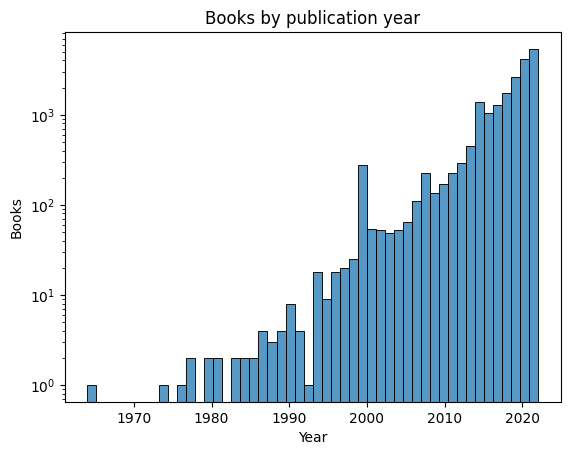

In [34]:
fig, ax = plt.subplots()
ax = sns.histplot(data=df, x='year', bins=50)
ax.set_xlabel('Year')
ax.set_ylabel('Books')
ax.set_yscale('log')
ax.set_title('Books by publication year')
plt.show()